In [2]:
import pandas as pd
import numpy as np  
import random as rd

In [4]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
#create genes(samples) and its dimensionality expressed through wildtype and knockout
genes = ['gene' + str(i) for i in range(1,101)]
wildtype = ['wt' + str(i) for i in range(1,6)]
knockout = ['ko' + str(i) for i in range(1,6)]

In [7]:
#create dataframe containing the columns which are unpacked from the wildtypes and knockout and indexed by genes(the samples)
data = pd.DataFrame(columns=[*wildtype,*knockout], index = genes)

In [15]:
#generate data from a poisson distribution and assign them to the gene exptressions
for gene in data.index:
  #for expressions wt1 to wt5 in gene(row value)
  data.loc[gene,"wt1":"wt5"]= np.random.poisson(lam= rd.randrange(10,1000), size = 5)
  #for expressions ko1 to ko5 in gene
  data.loc[gene,'ko1':'ko5']= np.random.poisson(lam=rd.randrange(10,10000), size = 5)

In [16]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,486,483,453,475,482,5081,5078,4922,5149,4926
gene2,822,789,782,748,820,4176,4474,4227,4398,4377
gene3,377,342,347,342,370,804,781,705,810,779
gene4,717,665,688,680,741,4143,4177,4096,4076,4321
gene5,244,248,253,253,277,9856,10026,9824,9891,9907


In [17]:
data.shape

(100, 10)

In [18]:
scaled_data = preprocessing.scale(data.T)

In [20]:
#create PCA object
pca = PCA()
#Calculate loading scores and variation each principal component accounts for
pca.fit(scaled_data)
#Generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pca.transform(scaled_data)

In [34]:
pca_data.shape

(10, 10)

In [26]:
##Create Scree Plot

#First thing to do is calculate the % variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)


#Create labels for the scree plot
labels = ['PC' + str(x) for x in range(1,len(per_var) + 1)]

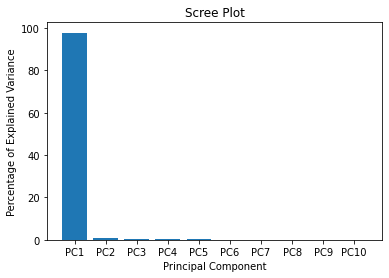

In [27]:
#create bar-plot

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

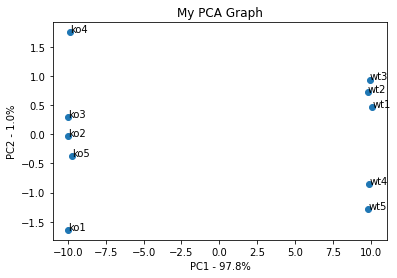

In [30]:
##Create PCA plot
#To draw PCA plot where coordinate(pca.transform(scaled.data)) into a matrix where samples are rows and cols are PCA labels

pca_df = pd.DataFrame(pca_data, index = [*wildtype,*knockout], columns=labels)

#draw the scatter plot
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#loop adds sample names to the graph

for sample in pca_df.index:
  plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))  

#show the graph
plt.show()

In [31]:
#look at loading scores of PC1 to see which genes had the largest influence separating the clusters across the x-axis

loading_scores = pd.Series(pca.components_[0],index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values 

print(loading_scores[top_10_genes])

gene15   -0.101088
gene77   -0.101087
gene95   -0.101087
gene37   -0.101086
gene23   -0.101086
gene74   -0.101086
gene30   -0.101085
gene66   -0.101085
gene82   -0.101084
gene78   -0.101084
dtype: float64
